In [135]:
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pyvista

In [136]:
geo_model = gp.create_data('SSJ',
                           extent = [0, 10000, 0, 1000, -3500, 0],
                           resolution= [100,50,100],
                           path_o="Orientaciones_GRABEN_VIM.txt",
                           path_i="Superficie_GRABEN_VIM.txt")

Active grids: ['regular']


In [3]:
#geo_model.surface_points

In [137]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,FallaMontesanto,Default series,1,#015482,1
1,Falla2,Default series,2,#9f0052,2
2,N2z,Default series,3,#ffbe00,3
3,N1jm,Default series,4,#728f02,4
4,N1r,Default series,5,#443988,5
5,basement,Basement,1,#ff3f20,6


In [138]:
geo_model.orientations

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,3533.3253,0,-2201.5645,0.422618,1.000026e-12,0.906308,0.01,FallaMontesanto
1,9030.9230,0,-2973.6917,-0.438371,9.999195e-13,0.898794,0.01,Falla2
2,4841.9716,0,-316.5349,-0.034899,9.999936e-13,0.999391,0.01,N2z
3,4940.4892,0,-891.6856,-0.034899,9.999936e-13,0.999391,0.01,N1jm
4,4548.0405,0,-2573.3794,-0.017452,9.999968e-13,0.999848,0.01,N1r


In [139]:
gp.map_stack_to_surfaces(geo_model,
                         {"FallaMontesanto": ('FallaMontesanto'),
                          "Falla2": ('Falla2'),
                          "Strat_Series": ('N2z', 'N1jm',
                                           'N1r')},
                         remove_unused_series=True)

,surface,series,order_surfaces,color,id
0,FallaMontesanto,FallaMontesanto,1,#015482,1
1,Falla2,Falla2,1,#9f0052,2
2,N2z,Strat_Series,1,#ffbe00,3
3,N1jm,Strat_Series,2,#728f02,4
4,N1r,Strat_Series,3,#443988,5
5,basement,Basement,1,#ff3f20,6


In [140]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,FallaMontesanto,FallaMontesanto,1,#015482,1
1,Falla2,Falla2,1,#9f0052,2
2,N2z,Strat_Series,1,#ffbe00,3
3,N1jm,Strat_Series,2,#728f02,4
4,N1r,Strat_Series,3,#443988,5
5,basement,Basement,1,#ff3f20,6


In [141]:
geo_model.stack

,order_series,BottomRelation,isActive,isFault,isFinite
FallaMontesanto,1,Erosion,True,False,False
Falla2,2,Erosion,True,False,False
Strat_Series,3,Erosion,True,False,False
Basement,4,Erosion,False,False,False


In [142]:
geo_model.set_is_fault(['FallaMontesanto', 'Falla2'])

Fault colors changed. If you do not like this behavior, set change_color to False.
Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
FallaMontesanto,1,Fault,True,True,False
Falla2,2,Fault,True,True,False
Strat_Series,3,Erosion,True,False,False
Basement,4,Erosion,False,False,False


In [143]:
geo_model.faults.faults_relations_df

,FallaMontesanto,Falla2,Strat_Series,Basement
FallaMontesanto,False,False,True,True
Falla2,False,False,True,True
Strat_Series,False,False,False,False
Basement,False,False,False,False


In [144]:
geo_model.faults

,order_series,BottomRelation,isActive,isFault,isFinite
FallaMontesanto,1,Fault,True,True,False
Falla2,2,Fault,True,True,False
Strat_Series,3,Erosion,True,False,False
Basement,4,Erosion,False,False,False


In [145]:
geo_model.grid

Grid Object. Values: 
array([[   50. ,    10. , -3482.5],
       [   50. ,    10. , -3447.5],
       [   50. ,    10. , -3412.5],
       ...,
       [ 9950. ,   990. ,   -87.5],
       [ 9950. ,   990. ,   -52.5],
       [ 9950. ,   990. ,   -17.5]])

In [146]:
gp.set_interpolator(
    geo_model,
    output=['geology'],
    theano_optimizer='fast compile')

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  2
Compilation Done!
Kriging values: 
                          values
range              10641.898327
$C_o$            2696428.571429
drift equations    [3, 3, 3, 3]


In [147]:
gp.get_data(geo_model, 'orientations')

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,3533.3253,0,-2201.5645,0.422618,1.000026e-12,0.906308,0.01,FallaMontesanto
1,9030.9230,0,-2973.6917,-0.438371,9.999195e-13,0.898794,0.01,Falla2
2,4841.9716,0,-316.5349,-0.034899,9.999936e-13,0.999391,0.01,N2z
3,4940.4892,0,-891.6856,-0.034899,9.999936e-13,0.999391,0.01,N1jm
4,4548.0405,0,-2573.3794,-0.017452,9.999968e-13,0.999848,0.01,N1r


/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


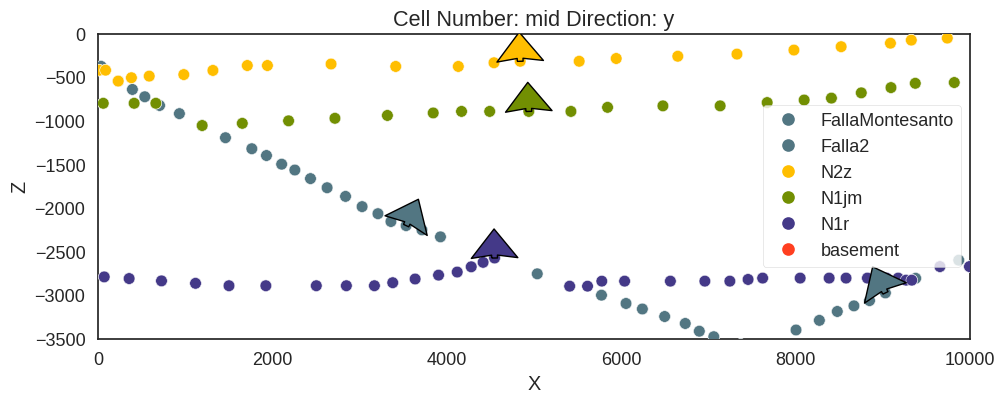

In [148]:
plot = gp.plot_2d(geo_model, show_lith=False, show_boundaries=False)
plt.show()

In [149]:
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

In [150]:
gp.get_data(geo_model, 'kriging')

,values
range,10641.898327
$C_o$,2696428.571429
drift equations,"[3, 3, 3, 3]"


In [151]:
sol = gp.compute_model(geo_model)

In [154]:
geo_model.solutions


Lithology ids 
  [6.        6.        6.        ... 4.        3.0000008 3.       ] 

/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


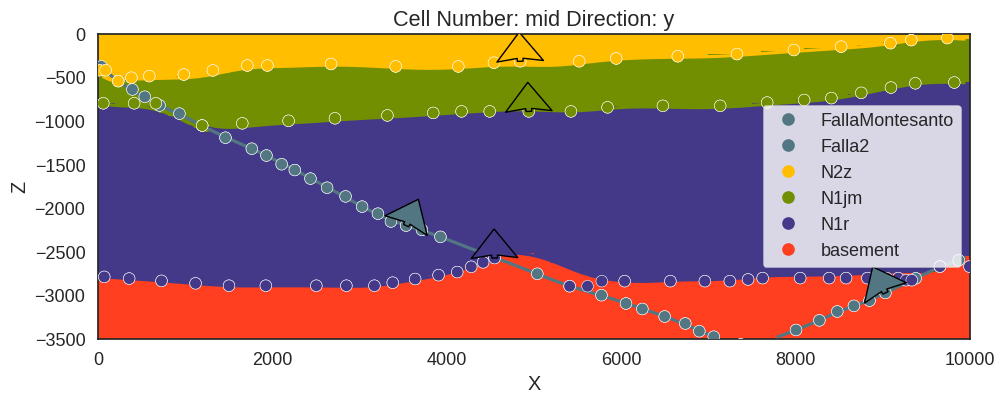

In [155]:
gp.plot_2d(geo_model, show_data=True)
plt.show()

In [156]:
#gp.plot_2d(geo_model, show_data=False, show_scalar=True, show_lith=False)
#plt.show()

In [157]:
#gp.plot_2d(geo_model, series_n=1, show_data=False, show_scalar=True, show_lith=False)
#plt.show()

In [158]:
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

In [159]:
geo_model.solutions.scalar_field_at_surface_points

array([[0.32239364, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.20180409, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.39617396, 0.37662705, 0.28451801]])

In [162]:
#gp.plot_2d(geo_model, show_block=True, show_lith=False)
#plt.show()

In [161]:
#gp.plot_2d(geo_model, series_n=1, show_block=True, show_lith=False)
#plt.show()

In [163]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,FallaMontesanto,FallaMontesanto,1,#527682,1
1,Falla2,Falla2,1,#527682,2
2,N2z,Strat_Series,1,#ffbe00,3
3,N1jm,Strat_Series,2,#728f02,4
4,N1r,Strat_Series,3,#443988,5
5,basement,Basement,1,#ff3f20,6


In [179]:
#guardar modelo 3d
import pickle
pickle.dump(geo_model, open("graben_VIM.p", "wb"))

In [180]:
#load
modelo = pickle.load(open("graben_VIM.p", "rb"))

In [182]:
#gp.plot_3d(modelo)

# ASIGNACIÓN PROPIEDADES GEOFÍSICAS

In [164]:
#ASIGNAR PROPIEDADES FISICAS
#geo_model.add_surface_values([2500, 2500, 2500, 2700, 2800, 2900], ['vp'])  #m/s vp
geo_model.add_surface_values([2.32, 2.32, 2.32, 2.3, 2.6, 2.8], ['density'])  #g/cm3 density
geo_model.surfaces

,surface,series,order_surfaces,color,id,density
0,FallaMontesanto,FallaMontesanto,1,#527682,1,2.320000
1,Falla2,Falla2,1,#527682,2,2.320000
2,N2z,Strat_Series,1,#ffbe00,3,2.320000
3,N1jm,Strat_Series,2,#728f02,4,2.300000
4,N1r,Strat_Series,3,#443988,5,2.600000
5,basement,Basement,1,#ff3f20,6,2.800000


/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


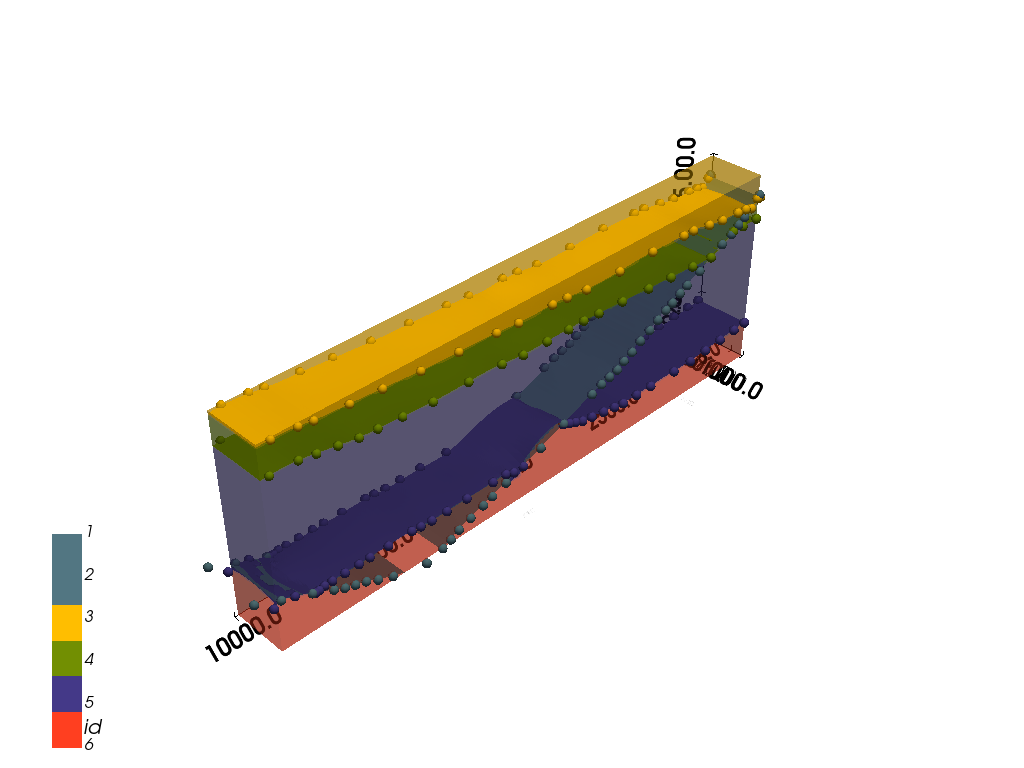

[StructuredGrid (0x70cfbd727ee0)
   N Cells:      480249
   N Points:     500000
   X Bounds:     5.000e+01, 9.950e+03
   Y Bounds:     1.000e+01, 9.900e+02
   Z Bounds:     -3.482e+03, -1.750e+01
   Dimensions:   100, 50, 100
   N Arrays:     1,

In [165]:
# Set up plotter
p3d = gp.plot_3d(geo_model, notebook=True)
# Plot data points and orientations
p3d.plot_data()

# Compute the model. Note that a solution is returned. We will use this later
sol = gp.compute_model(geo_model)

# Plot the surfaces
p3d.plot_surfaces()
# Plot the lithological units
p3d.plot_structured_grid('lith')

In [166]:
sol.values_matrix #asignar propiedades geofísicas al modelo

array([[2.8       , 2.8       , 2.8       , ..., 2.3       , 2.31999998,
        2.32      ]])

In [167]:
sol.values_matrix.shape

(1, 500000)

/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


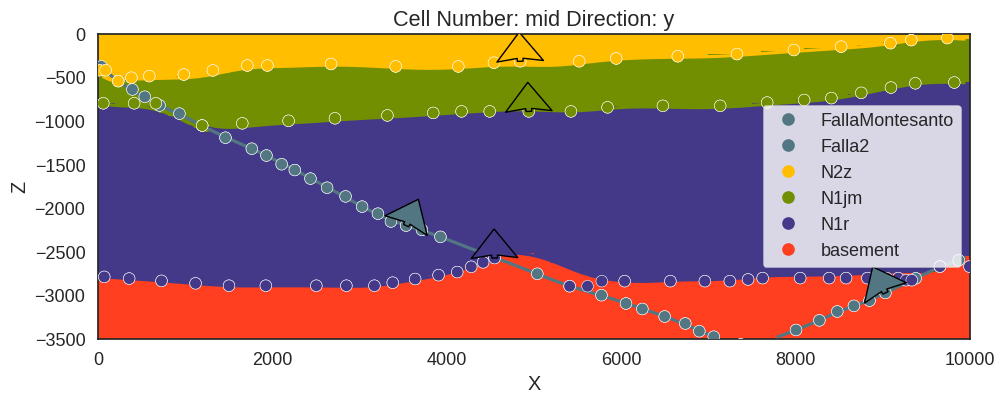

In [168]:
gp.plot_2d(geo_model)

In [169]:
# Reshaping our data to the shape required by Devito
import numpy as np
shape = [100,50,100]
reshaped = np.reshape(sol.values_matrix, shape, order='C')
modelo_propiedades = np.flip(reshaped, axis=2).T

In [170]:
modelo_propiedades.shape

(100, 50, 100)

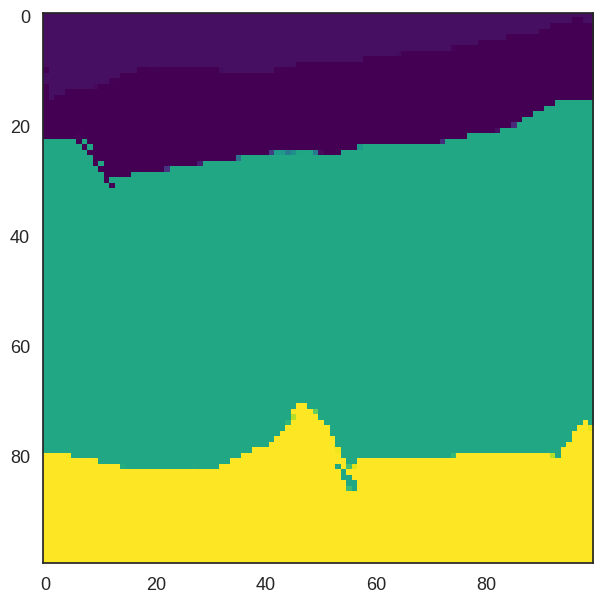

In [171]:
plt.imshow(modelo_propiedades[:,49,:], cmap='viridis')

In [172]:
np.save('densidad.npy', modelo_propiedades)

In [173]:
xp =np.load('densidad.npy')

In [204]:
#gp.plot_2d(geo_model, notebook=True)

In [175]:
import matplotlib.pyplot as plt

# Take the center slice in the x directio
# Remember that in Devito, indexing convention is [x, y, z] (need to flip for correct imshow display)
#plt.imshow(xp[:,0,:], cmap='viridis')
#plt.title('Velocidad de Onda P (m/s)')
#plt.colorbar(location="bottom", shrink=0.5)
#plt.savefig('Vp_ssj.png', dpi=300)
#plt.show()

# PROPAGACIÓN DEL ERROR: MÉTODO MONTE CARLO

In [125]:
indices_bool = geo_model.surface_points.df['surface'].isin(['N1r','N1jm','N2z'])

In [126]:
indices = geo_model.surface_points.df.index[indices_bool]
indices

Index([ 42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
       ...
       233, 234, 235, 236, 237, 238, 239, 240, 241, 242],
      dtype='int64', length=159)

In [132]:
Z_init = geo_model.surface_points.df.loc[(indices, ['Z', 'surface'])].copy()

In [133]:
df = pd.DataFrame(Z_init)

,Z,surface
42,-418.8667,N2z
43,-418.8667,N2z
44,-543.8279,N2z
45,-505.2983,N2z
46,-486.8889,N2z
...,...,...
238,-2803.5838,N1r
239,-2827.5420,N1r
240,-2827.5420,N1r
241,-2671.5178,N1r


In [139]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,FallaMontesanto,FallaMontesanto,1,#527682,1
1,Falla2,Falla2,1,#527682,2
2,N2z,Strat_Series,1,#ffbe00,3
3,N1jm,Strat_Series,2,#728f02,4
4,N1r,Strat_Series,3,#443988,5
5,basement,Basement,1,#ff3f20,6


In [140]:
# Filtrar el DataFrame
capa1 = df[df['surface'] == 'N2z']['Z']
capa2 = df[df['surface'] == 'N1jm']['Z']
capa3 = df[df['surface'] == 'N1r']['Z']

In [142]:
p3d = gp.plot_3d(geo_model, image=False, show_data=False, plotter_type='basic')

In [143]:
def sample(silent=True):
    Z_var = np.random.normal(0, 30, size=3)
    Z_loc = np.hstack([capa1 + Z_var[0],
                       capa2 + Z_var[1],
                       capa3 + Z_var[2]])
    
    if silent:
        geo_model.modify_surface_points(indices, Z=Z_loc)
        gp.compute_model(geo_model)
    else:
        # Crear un objeto de trazado utilizando gp.plot_2d
        plot_object = gp.plot_2d(geo_model)
        
        # Pasar el objeto de trazado como argumento a modify_surface_points
        geo_model.modify_surface_points(indices, Z=Z_loc, plot_object=plot_object)
    
    return geo_model.solutions.lith_block

In [144]:
lith_blocks = np.array([])
n_iterations = 50  # Número de iteraciones que deseas

for i in range(n_iterations):
    lith_blocks = np.append(lith_blocks, sample())

In [145]:
lith_blocks.shape

(25000000,)

In [146]:
lith_blocks = lith_blocks.reshape(n_iterations, -1)
lith_blocks.shape, lith_blocks

((50, 500000),
 array([[6.        , 6.        , 6.        , ..., 4.        , 3.        ,
         3.        ],
        [6.        , 6.        , 6.        , ..., 4.        , 4.        ,
         3.01175932],
        [6.        , 6.        , 6.        , ..., 4.        , 4.        ,
         3.00569217],
        ...,
        [6.        , 6.        , 6.        , ..., 3.        , 3.        ,
         3.        ],
        [6.        , 6.        , 6.        , ..., 3.00003228, 3.        ,
         3.        ],
        [6.        , 6.        , 6.        , ..., 3.99999999, 3.        ,
         3.        ]]))

In [147]:
from gempy.bayesian.fields import compute_prob, calculate_ie_masked
prob_block = compute_prob(lith_blocks)

/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/gempy/bayesian/fields.py:8: UserWarning: This function is Deprecated, please use the probability function instead
  warnings.warn("This function is Deprecated, please use the probability function instead")


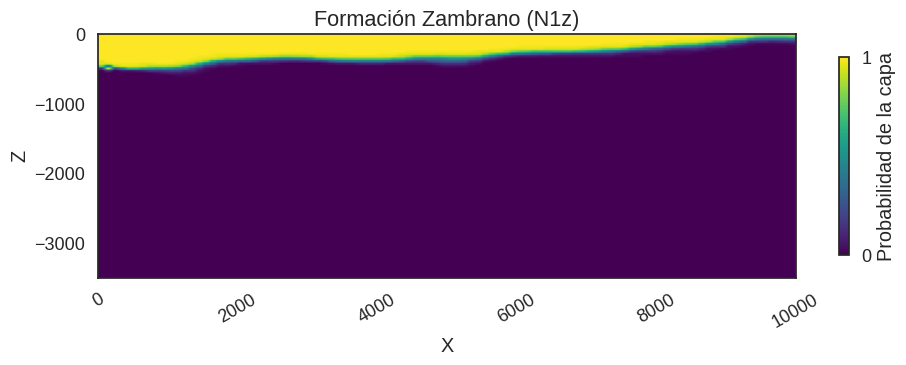

In [152]:
layer = 0
p2dp = gp.plot_2d(geo_model,
                  show_lith=False, show_boundaries=False,
                  show_data=False,
                  regular_grid=prob_block[layer],
                  kwargs_regular_grid={'cmap': 'viridis', 'norm': None})

prob_min = prob_block[layer].min()  # Valor mínimo de probabilidad
prob_max = prob_block[layer].max()  # Valor máximo de probabilidad

# Crear algunos datos de muestra
data = np.random.rand(50, 50)

# Crear un gráfico con imshow y obtener el objeto mappable
mappable = plt.imshow(data, cmap='viridis')

# Agregar un título a la imagen
plt.title('Formación Zambrano (N1z)')

# Crear una barra de color usando el objeto mappable
colorbar = plt.colorbar(mappable, shrink=0.3)

# Editar los números de los ticks de la barra de color
colorbar.set_ticks([0, 1])  # Definir las ubicaciones de los ticks
#colorbar.set_ticklabels(['Bajo', 'Medio', 'Alto'])  # Definir las etiquetas de los ticks
colorbar.set_label('Probabilidad de la capa')  # Definir la etiqueta

# Guardar la figura después de mostrarla
plt.savefig('Probabilidad_N1z_VIM.png', dpi=300)
plt.show()

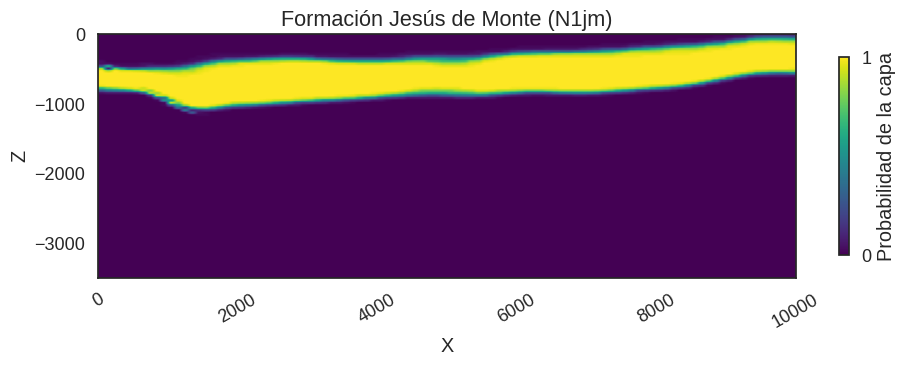

In [153]:
layer = 1
p2dp = gp.plot_2d(geo_model,
                  show_lith=False, show_boundaries=False,
                  show_data=False,
                  regular_grid=prob_block[layer],
                  kwargs_regular_grid={'cmap': 'viridis', 'norm': None})

prob_min = prob_block[layer].min()  # Valor mínimo de probabilidad
prob_max = prob_block[layer].max()  # Valor máximo de probabilidad

# Crear algunos datos de muestra
data = np.random.rand(50, 50)

# Crear un gráfico con imshow y obtener el objeto mappable
mappable = plt.imshow(data, cmap='viridis')

# Agregar un título a la imagen
plt.title('Formación Jesús de Monte (N1jm)')

# Crear una barra de color usando el objeto mappable
colorbar = plt.colorbar(mappable, shrink=0.3)

# Editar los números de los ticks de la barra de color
colorbar.set_ticks([0, 1])  # Definir las ubicaciones de los ticks
#colorbar.set_ticklabels(['Bajo', 'Medio', 'Alto'])  # Definir las etiquetas de los ticks
colorbar.set_label('Probabilidad de la capa')  # Definir la etiqueta

# Guardar la figura después de mostrarla
plt.savefig('Probabilidad_N1jm_VIM.png', dpi=300)
plt.show()

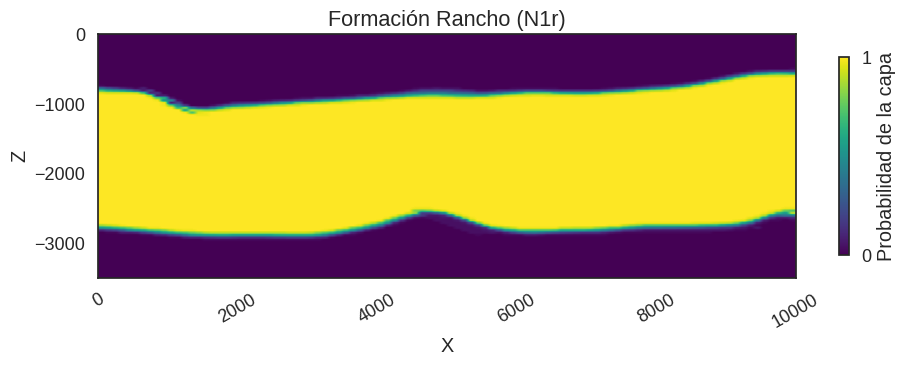

In [154]:
layer = 2
p2dp = gp.plot_2d(geo_model,
                  show_lith=False, show_boundaries=False,
                  show_data=False,
                  regular_grid=prob_block[layer],
                  kwargs_regular_grid={'cmap': 'viridis', 'norm': None})

prob_min = prob_block[layer].min()  # Valor mínimo de probabilidad
prob_max = prob_block[layer].max()  # Valor máximo de probabilidad

# Crear algunos datos de muestra
data = np.random.rand(50, 50)

# Crear un gráfico con imshow y obtener el objeto mappable
mappable = plt.imshow(data, cmap='viridis')

# Agregar un título a la imagen
plt.title('Formación Rancho (N1r)')

# Crear una barra de color usando el objeto mappable
colorbar = plt.colorbar(mappable, shrink=0.3)

# Editar los números de los ticks de la barra de color
colorbar.set_ticks([0, 1])  # Definir las ubicaciones de los ticks
#colorbar.set_ticklabels(['Bajo', 'Medio', 'Alto'])  # Definir las etiquetas de los ticks
colorbar.set_label('Probabilidad de la capa')  # Definir la etiqueta

# Guardar la figura después de mostrarla
plt.savefig('Probabilidad_N1r_VIM.png', dpi=300)
plt.show()